# Домашняя работа 7. Экспериментальная вероятность часть 2.

Вариант 3.

Лазарев Эдуард Артемович
N33471

## Задача

Колода игральных карт содержит 52 карты, разделяющиеся на 4 различные масти по 13 карт в каждой. Предположим, что колода тщательно перетасована, так что вытаскивание любой карты одинаково вероятно. Вытащим 6 из них. 

Найти вероятность того, что среди этих карт королей будет больше чем десяток.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
import random
from scipy.special import binom

Пускай точность будет равна двум знакам после запятой.

Объявляем процедуру эксперемента

In [3]:
def experiment(n, prob_series=None):
    """
    Проводит n эксперементов и возвращает отношение 
    благоприятных исходов ко всем исходам.
    """

    # Количество событий в которых королей больше чем десяток.
    k_success = 0
    
    # 52 карты. Нам важны только короли и десятки, а значит остлаьные карты 
    # можно оставить заглушками.
    cards = ["k"] * 4 + ["10"] * 4 + ["other"] * (52 - 8)

    for iteration in range(1, n + 1):
        # Выбираем 6 кард из 52.
        selected = random.sample(cards, 6)

        # Это благоприятный исход, если королей больше десяток.
        if selected.count("k") > selected.count("10"):
            k_success += 1

        if prob_series is not None:
            prob_series.append(k_success / iteration)

    return k_success / n

Проведём миллион эксперементов и посмотрим на сходимость 
нашей оценки к какому-нибудь числу.

In [4]:
N = 1000000
prob_series = []

p = experiment(N, prob_series=prob_series)

print(f"Полученная вероятность события: {p=}")

Полученная вероятность события: p=0.27206


In [5]:
# Убираем первые элементы из серии вероятностей, потому что они 
# имеют слишком большой разброс в начале и на графике ничего из-за 
# этого не будет видно.
removed_in_begin = 100000
prob_series_short = prob_series[removed_in_begin:]

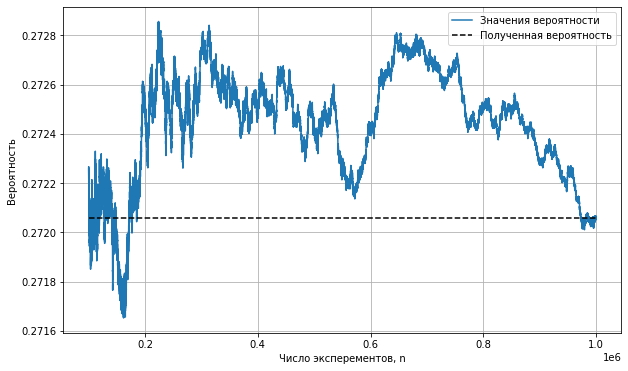

In [6]:
x = range(removed_in_begin, N)
plt.plot(x, prob_series_short, label='Значения вероятности')
plt.plot([removed_in_begin, N - 1], [p, p], ls="--", color="black", label='Полученная вероятность')
plt.xlabel("Число эксперементов, n")
plt.ylabel("Вероятность")
plt.legend()
plt.grid()

Видим, что при увеличении числа экспериментов оценка вероятности сходится к значению 0.27.

Проведём серии по пять вычислений вероятностей для N эксперементов и 2N эксперементов.
Проверим что оценка вероятности не изменяется (с точностью два знака после запятой).

In [7]:
probabilities = []
probabilities_2 = []

for i in range(5):
    probabilities.append(experiment(N))
    probabilities_2.append(experiment(N * 2))
    print(f"\r{(i + 1) * 20}%", end="")

100%

In [8]:
print(f"Полученные вероятности при {N} эксперементах: {probabilities}")
print(f"Среднее арифметическое: {round(np.mean(probabilities), 2)}\n")
print(f"Полученные вероятности при {2 * N} эксперементах: {probabilities_2}")
print(f"Среднее арифметическое: {round(np.mean(probabilities_2), 2)}\n")

Полученные вероятности при 1000000 эксперементах: [0.273588, 0.272674, 0.272276, 0.272472, 0.273018]
Среднее арифметическое: 0.27

Полученные вероятности при 2000000 эксперементах: [0.2721455, 0.272875, 0.272398, 0.2724085, 0.2729075]
Среднее арифметическое: 0.27



Видим что при увеличении числа экспериментов оценка вероятности не меняется.

Проведём аналитическое решение для проверки результатов.

Формула по которой будем проверять:

$$p = \frac{\sum_{i=1}^4 \sum_{j=0}^{min(i-1, 2)} C_4^i \cdot C_4^j \cdot C_{44}^{6-i-j}}{C_{52}^6}$$

In [9]:
p_analitic = 0

for i in range(1, 5):
    for j in range(min(i, 3)):
        p_analitic += binom(4, i) * binom(4, j) * binom(44, 6-i-j)
p_analitic /= binom(52, 6)

print(f"Аналитическое решение: {p_analitic}")
print(f"Полученная оценка вероятности: {p}")

Аналитическое решение: 0.2724505514153288
Полученная оценка вероятности: 0.27206


Видим что вероятность близка к истенной. 

## Вывод
Значение полученной экспериментальной вероятности p = 0.27 соответствует результатам расчета в пределах заданной точности. Кроме того, увеличение количества экспериментов в два раза не влияет на оценку. Следовательно, в ходе эксперимента было получено корректное значение экспериментальой вероятности.